## Lesson 3. Clip a spatial vector layer using Shapely and GeoPandas

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import earthpy as et

# Load the box module from shapely to create box objects
from shapely.geometry import box

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

In [2]:
sns.set(font_scale=1.5, style='white')

In [3]:
data_path = et.data.get_data('spatial-vector-lidar')

In [4]:
country_bdy_us = gpd.read_file(os.path.join(data_path,
                                            'usa',
                                            'usa-boundary-dissolved.shp'))
country_bdy_us

,NAME,geometry
0,United States,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."


In [5]:
state_bdy_us = gpd.read_file(os.path.join(data_path,
                                          'usa',
                                          'usa-states-census-2014.shp'))
state_bdy_us

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."
5,17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,Midwest,"POLYGON Z ((-91.50617 40.20064 0.00000, -91.49..."
6,19,01779785,0400000US19,19,IA,Iowa,00,144668594415,1076856589,Midwest,"POLYGON Z ((-96.62187 42.77925 0.00000, -96.57..."
7,21,01779786,0400000US21,21,KY,Kentucky,00,102262419204,2393338940,Southeast,"POLYGON Z ((-89.54443 36.57451 0.00000, -89.47..."
8,22,01629543,0400000US22,22,LA,Louisiana,00,111901043977,23750204105,Southeast,"POLYGON Z ((-94.04305 32.69303 0.00000, -94.04..."
9,24,01714934,0400000US24,24,MD,Maryland,00,25147575220,6983455225,Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ..."


In [6]:
pop_places = gpd.read_file(os.path.join(data_path,
                                        'global',
                                        'ne_110m_populated_places_simple',
                                        'ne_110m_populated_places_simple.shp'))
pop_places

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,pop_other,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,...,562430,2,2,6691831.0,None,Vatican City,1,0,7.0,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,0,San Marino,1.0,...,0,7,7,3168070.0,None,San Marino,1,5,6.1,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,0,Vaduz,1.0,...,33009,7,5,3042030.0,None,Vaduz,1,0,6.7,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,0,Lobamba,0.0,...,0,5,4,935048.0,None,Lobamba,1,5,6.0,POINT (31.20000 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,0,Luxembourg,1.0,...,106219,9,8,2960316.0,None,Luxembourg,1,0,6.0,POINT (6.13000 49.61166)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0,600,1,Admin-1 capital,Rio de Janeiro,None,None,0,Rio de Janeiro,0.0,...,1821489,14,12,3451190.0,Rio de Janeiro,Rio de Janeiro,1,0,1.7,POINT (-43.22697 -22.92308)
239,0,600,1,Admin-1 capital,São Paulo,None,Sao Paulo|Sio Paulo,0,Sao Paulo,0.0,...,11522944,14,14,3448439.0,S,Sao Paolo,1,0,3.0,POINT (-46.62697 -23.55673)
240,0,600,3,Admin-1 capital,Sydney,None,None,0,Sydney,0.0,...,2669348,12,12,2147714.0,Sydney,Sydney1,1,0,1.7,POINT (151.18323 -33.91807)
241,0,600,0,Admin-0 capital,Singapore,None,None,0,Singapore,1.0,...,3314179,13,12,1880252.0,Singapore,Singapore,1,5,2.1,POINT (103.85387 1.29498)


In [7]:
print(country_bdy_us.crs, '\n\n', state_bdy_us.crs, '\n\n', pop_places.crs)

epsg:4326 

 epsg:4326 

 epsg:4326


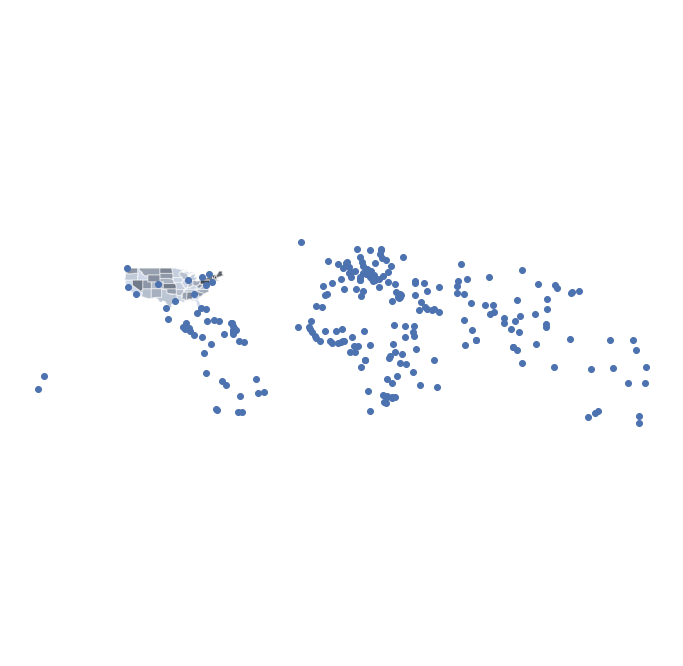

In [8]:
fig, ax = plt.subplots(figsize=(12,12))

country_bdy_us.plot(alpha=0.5,
                    ax=ax)
state_bdy_us.plot(cmap='Greys',
                  ax=ax,
                  alpha=0.5)
pop_places.plot(ax=ax)

plt.axis('equal')
ax.set_axis_off()
plt.show()

**Clip the points shapefile.** This uses the <code>.clip()</code> GeoPandas method

In [9]:
pop_places_clip = gpd.clip(pop_places, country_bdy_us)
pop_places_clip

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,pop_other,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,geometry
175,1,300,1,Populated place,San Francisco,None,San Francisco-Oakland,0,San Francisco,0.0,...,27400,12,11,5391959.0,San Francisco-Oakland,San Francisco1,1,0,2.7,POINT (-122.41717 37.76920)
176,1,300,1,Admin-1 capital,Denver,None,Denver-Aurora,0,Denver,0.0,...,1521278,12,12,5419384.0,Denver-Aurora,Denver,1,0,3.7,POINT (-104.98596 39.74113)
177,1,300,1,Populated place,Houston,None,None,0,Houston,0.0,...,3607616,12,12,4699066.0,Houston,Houston,1,0,3.0,POINT (-95.34193 29.82192)
178,1,300,1,Populated place,Miami,None,None,0,Miami,0.0,...,1037811,13,10,4164138.0,Miami,Miami,1,0,2.1,POINT (-80.22605 25.78956)
179,1,300,1,Admin-1 capital,Atlanta,None,None,0,Atlanta,0.0,...,2874096,12,10,4180439.0,Atlanta,Atlanta,1,0,3.0,POINT (-84.40190 33.83196)
180,1,300,1,Populated place,Chicago,None,None,0,Chicago,0.0,...,3635101,13,12,4887398.0,Chicago,Chicago,1,0,3.0,POINT (-87.75200 41.83194)
216,0,600,1,Populated place,Los Angeles,None,Los Angeles-Long Beach-Santa Ana,0,Los Angeles,0.0,...,142265,14,12,5368361.0,Los Angeles-Long Beach-Santa Ana,Los Angeles1,1,0,2.0,POINT (-118.18193 33.99192)
217,0,600,1,Admin-0 capital,"Washington, D.C.",None,Washington D.C.,0,"Washington, D.C.",1.0,...,2175991,12,11,4140963.0,"Washington, D.C.","Washington, D.C.",1,5,2.1,POINT (-77.01136 38.90150)
218,0,600,1,Populated place,New York,None,New York-Newark,0,New York,0.0,...,9292603,14,13,5128581.0,New York-Newark,New York,1,0,1.7,POINT (-73.98196 40.75192)


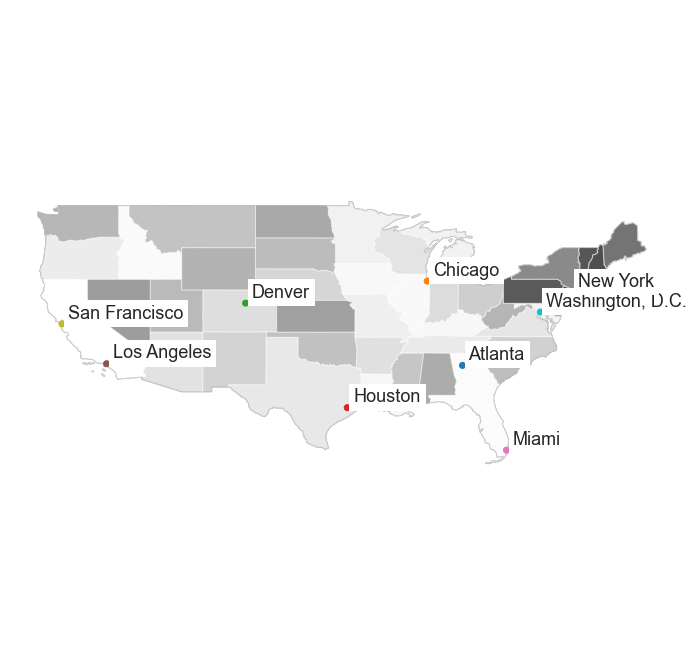

In [10]:
fig, ax = plt.subplots(figsize=(12,12))

country_bdy_us.plot(alpha=0.5,
                    color='white',
                    edgecolor='black',
                    ax=ax)
state_bdy_us.plot(cmap='Greys',
                  ax=ax,
                  alpha=0.5)
pop_places_clip.plot(ax=ax,
                     column='name')

plt.axis('equal')
ax.set_axis_off()

# Label each point
pop_places_clip.apply(lambda x: ax.annotate(text=x['name'],
                                            xy=x.geometry.coords[0],
                                            xytext=(6,6),
                                            textcoords='offset points',
                                            backgroundcolor='white'),
                      axis=1)
plt.show()

**Clip a line or polygon layer to an extent.** This uses select by location and subsetting. The clipping, using shapely and geopandas, only returns the clipped geometry. This needs to be set to equal to the subset of the original data to retain attributes. Use <code>set_geometry()</code> for this.

This example will clip the natural earth roads layer to the <code>country_bdy_us</code> layer.

First import the roads

In [16]:
ne_roads = gpd.read_file(os.path.join(data_path.strip('.'),
                                      'global',
                                      'ne_10m_roads',
                                      'ne_10m_roads.shp'))
ne_roads

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,...,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,...,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,...,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."
3,8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",151,None,None,None,...,0,0,None,0,North America,0,Federal,7.1,9.6,"LINESTRING (-87.72757 44.15165, -87.57301 44.1..."
4,6,Road,Major Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",GSP,None,None,None,...,0,0,None,311305,North America,1,State,6.0,8.5,"MULTILINESTRING ((-74.75920 39.14301, -74.6735..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56596,4,Road,Secondary Highway,None,None,New in version 2.0.0,None,None,None,None,...,71863,37478,None,0,Oceania,0,Federal,4.0,7.0,"LINESTRING (168.44462 -45.72081, 168.44570 -45..."
56597,4,Road,Secondary Highway,None,None,New in version 2.0.0,None,None,None,None,...,71863,37478,None,0,Oceania,0,Federal,4.0,7.0,"LINESTRING (168.48463 -45.60669, 168.46426 -45..."
56598,8,Road,Secondary Highway,None,None,New in version 2.0.0,None,None,None,None,...,71864,37479,None,0,Oceania,0,Federal,7.1,9.6,"LINESTRING (168.23276 -45.67076, 168.25352 -45..."
56599,8,Road,Secondary Highway,None,None,New in version 2.0.0,None,None,None,None,...,71864,37479,None,0,Oceania,0,Federal,7.1,9.6,"LINESTRING (167.89803 -45.16523, 167.86984 -45..."


In [17]:
if ne_roads.crs == country_bdy_us.crs:
    print('Both layers are in the same crs', ne_roads.crs, country_bdy_us.crs)

Both layers are in the same crs epsg:4326 epsg:4326


Plot roads to see what they look like.

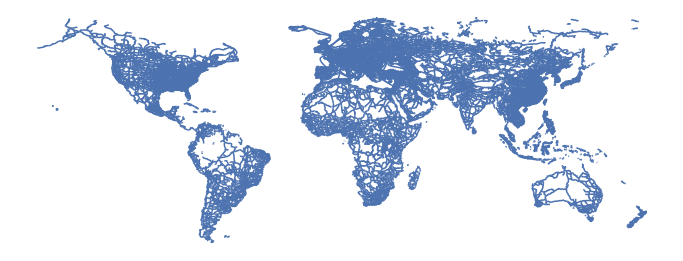

In [19]:
fig, ax = plt.subplots(figsize=(12,12))

ne_roads.plot(ax=ax)

ax.set_axis_off()
plt.show()

Simplify the geometry of the clip extent for faster processing. This modifies the data so be careful when using this.

In [20]:
country_bdy_us_sim = country_bdy_us.simplify(0.2, preserve_topology=True)

Clip and plot the data

In [23]:
ne_roads_clip = gpd.clip(ne_roads, country_bdy_us_sim)

In [24]:
ne_roads_clip[ne_roads_clip.is_empty == True]

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry


As above there are no rows with empty geometry, but this is how the would be removed anyway.

In [27]:
ne_roads_clip.shape

(7346, 32)

In [26]:
ne_roads_clip = ne_roads_clip[~ne_roads_clip.is_empty]

In [28]:
ne_roads_clip.shape

(7346, 32)

In [29]:
dir(et)

['Data',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'data',
 'epsg',
 'io',
 'json',
 'resource_string']

In [30]:
dir(et.data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_download',
 '_download_and_extract',
 'data_keys',
 'get_data',
 'path']

In [31]:
dir(et.epsg)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [32]:
type(et.epsg)

dict

In [33]:
et.epsg

{'29188': '+proj=utm +zone=18 +south +ellps=aust_SA +towgs84=-66.87,4.37,-38.52,0,0,0,0 +units=m +no_defs',
 '26733': '+proj=tmerc +lat_0=54 +lon_0=-146 +k=0.9999 +x_0=152400.3048006096 +y_0=0 +datum=NAD27 +units=us-ft +no_defs',
 '24600': '+proj=lcc +lat_1=32.5 +lat_0=32.5 +lon_0=45 +k_0=0.9987864078000001 +x_0=1500000 +y_0=1166200 +ellps=clrk80 +towgs84=-294.7,-200.1,525.5,0,0,0,0 +units=m +no_defs',
 '32189': '+proj=tmerc +lat_0=0 +lon_0=-76.5 +k=0.9999 +x_0=304800 +y_0=0 +datum=NAD83 +units=m +no_defs',
 '4899': '+proj=geocent +ellps=intl +units=m +no_defs',
 '29189': '+proj=utm +zone=19 +south +ellps=aust_SA +towgs84=-66.87,4.37,-38.52,0,0,0,0 +units=m +no_defs',
 '26734': '+proj=tmerc +lat_0=54 +lon_0=-150 +k=0.9999 +x_0=152400.3048006096 +y_0=0 +datum=NAD27 +units=us-ft +no_defs',
 '7402': '+proj=lcc +lat_1=46.8 +lat_0=46.8 +lon_0=0 +k_0=0.99987742 +x_0=600000 +y_0=2200000 +a=6378249.2 +b=6356515 +towgs84=-168,-60,320,0,0,0,0 +pm=paris +units=m +vunits=m +no_defs',
 '26951': '+p

In [34]:
dir(et.io)

['ALLOWED_FILE_TYPES',
 'DATA_NAME',
 'DATA_URLS',
 'Data',
 'HOME',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'earthpy',
 'io',
 'op',
 'os',
 'path_to_example',
 're',
 'requests',
 'tarfile',
 'zipfile']

In [35]:
type(et.io.earthpy)

module

In [36]:
dir(et.io.earthpy)

['Data',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'data',
 'epsg',
 'io',
 'json',
 'resource_string']

What does <code>simplify</code> do?

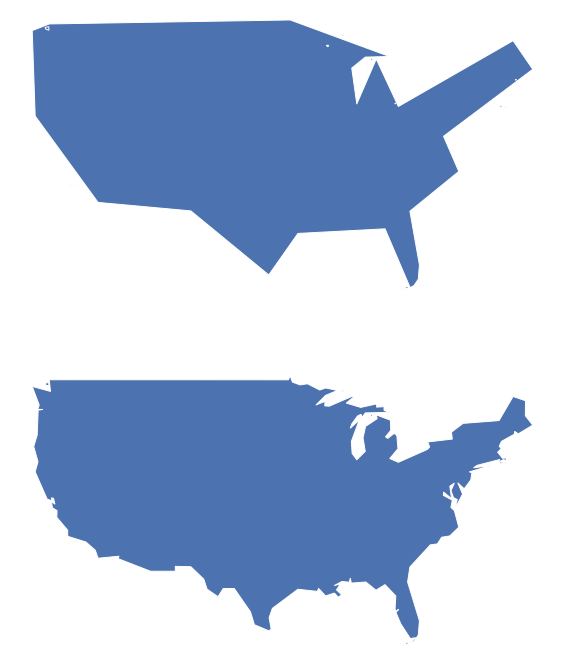

In [38]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,12))

country_bdy_us.simplify(2, preserve_topology=True).plot(ax=ax1)

country_bdy_us.simplify(0.2, preserve_topology=True).plot(ax=ax2)

ax1.set_axis_off()
ax2.set_axis_off()
plt.show()

Now plot the clipped roads

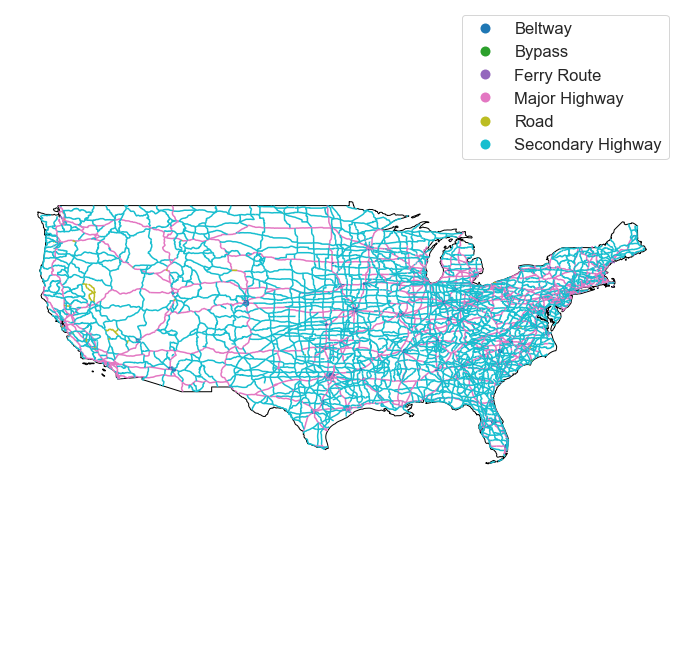

In [39]:
fig, ax = plt.subplots(figsize=(12,12))

country_bdy_us.plot(color='white',
                    edgecolor='black',
                    ax=ax)

ne_roads_clip.plot(ax=ax,
                   column='type',
                   legend=True)

ax.set_axis_off()
plt.axis('equal')
plt.show()

**Create a custom legend for the above plot**

In [41]:
for ctype, data in ne_roads_clip.groupby('type'):
    print('ctype = ', ctype, '\ndata = ', data)

ctype =  Beltway 
data =        scalerank featurecla     type sov_a3  note  \
345           7       Road  Beltway    USA  None   
1310          3       Road  Beltway    USA  None   
1325          3       Road  Beltway    USA  None   
1330          4       Road  Beltway    USA  None   
1331          4       Road  Beltway    USA  None   
...         ...        ...      ...    ...   ...   
4154          5       Road  Beltway    USA  None   
4164          3       Road  Beltway    USA  None   
4179          6       Road  Beltway    USA  None   
4181          7       Road  Beltway    USA  None   
4182          7       Road  Beltway    USA  None   

                                                 edited name namealt namealtt  \
345   Version 1.5: Changed alignment, a few adds in ...  494    None     None   
1310                               New in version 2.0.0   95    None     None   
1325                               New in version 2.0.0   95    None     None   
1330                     

Fist create a dictionary with the attributes of each legend item

In [42]:
road_attrs = {'Beltway': ['black', 2],
              'Secondary Highway': ['grey', 0.5],
              'Road': ['grey', 0.5],
              'Bypass': ['grey', 0.5],
              'Ferry Route': ['grey', 0.5],
              'Major Highway': ['black', 1]}

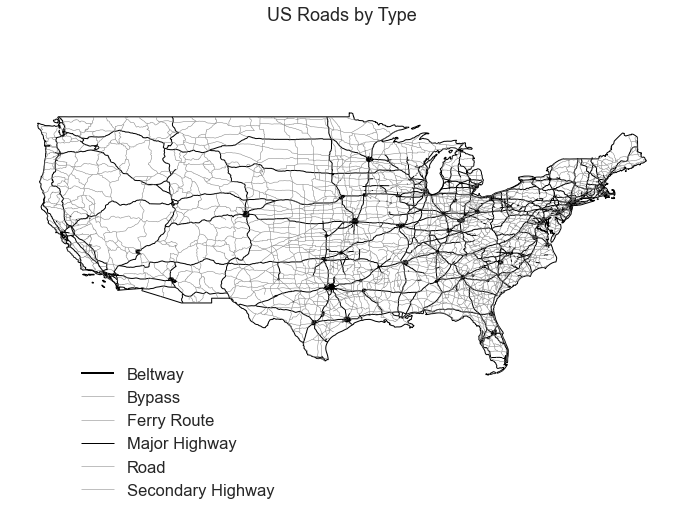

In [44]:
fig, ax = plt.subplots(figsize=(12,8))

for ctype, data in ne_roads_clip.groupby('type'):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              ax=ax,
              linewidth=road_attrs[ctype][1])
    
country_bdy_us.plot(color='white',
                    edgecolor='black',
                    ax=ax)

ax.legend(frameon=False,
          loc = (0.1, -0.1))
ax.set_title('US Roads by Type')

ax.set_axis_off()
plt.axis('equal')
plt.show()